<a href="https://colab.research.google.com/github/IrishEgie/nb_chatbot/blob/main/chatbot_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Training the Model using Naive-Base Algo**


### **1. Loading Necessary Libraries**


- **numpy**: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.
- **matplotlib.pyplot**: Used for plotting graphs and visualizations.
- **seaborn**: A data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
- **pandas**: Provides data structures and data analysis tools.
- **json**: Used for parsing and manipulating JSON data.
- **sklearn.feature_extraction.text.TfidfVectorizer**: Converts a collection of raw documents to a matrix of TF-IDF features.
- **sklearn.naive_bayes.MultinomialNB**: A Naive Bayes classifier for multinomially distributed data.
- **sklearn.pipeline.make_pipeline**: Combines several steps into one pipeline to simplify machine learning workflows.
- **sklearn.model_selection.train_test_split**: Splits the dataset into training and testing sets.
- **sklearn.metrics.confusion_matrix, accuracy_score**: Used to evaluate the performance of the classification model.
- **joblib**: Provides a way to save and load Python objects.
- **re**: Regular expression operations.


In [4]:
# Loading the necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib
import re


### **2. Mounting Google Drive**

- **google.colab.drive**: Imports the Google Drive module to interact with Google Drive in a Colab environment.
- **drive.mount()**: Mounts Google Drive to the specified directory, allowing access to files stored in Google Drive.
- Check if the directory exists; if not, create it

In [2]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive/')

# Define the directory path
dir_path = '/content/drive/MyDrive/Dev/Chatbot/'

# Check if the directory exists; if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
    print(f"Directory '{dir_path}' created.")
else:
    print(f"Directory '{dir_path}' already exists.")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Directory '/content/drive/MyDrive/Dev/Chatbot/' already exists.


- **Note**: You need to copy the dataTraining.json from the 'uploads' folder to your google drive's Dev/Chatbot location

### **3. Loading and Preparing the Dataset**
- **sns.set()**: Sets the seaborn style for the plots.
- **data_path**: Specifies the path to the dataset stored in Google Drive.
- **open()**: Opens the JSON file.
- **json.load()**: Loads the data from the JSON file.
- **pd.DataFrame()**: Converts the JSON data (a list of dictionaries) into a pandas DataFrame for easier manipulation.
- **df.head()**: Displays the first few rows of the DataFrame to check the data.

### **4. Data Cleaning**
- **df.drop()**: Drops the 'FIELD134' column if it exists in the DataFrame.

### **5. Separating Features and Target Variable**
- **X**: Contains all columns except 'prognosis' (features).
- **y**: Contains only the 'prognosis' column (target variable).
- **X.dtypes**: Displays the data types of each column in X to ensure all features are numeric.

### **6. Handling Lists or Sequences in DataFrame**
- **for loop**: Iterates over each column in X to check if it contains lists or sequences.
- **X[col].apply()**: Applies a function to check if any entry in the column is a list.
- **sum(x)**: Sums up the values if the column contains lists (assuming numeric lists).


In [5]:
# Setting seaborn style
sns.set()

# Define the file path for the dataset
data_path = '/content/drive/MyDrive/Dev/Chatbot/dataTraining.json'

# Loading the dataset from JSON file
with open(data_path, 'r') as file:
    data = json.load(file)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Debugging: Check the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Removing the 'FIELD134' column if it exists
if 'FIELD134' in df.columns:
    df = df.drop('FIELD134', axis=1)

# Separating features and target variable
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# Check the data types of each column
print("Data types in X:")
print(X.dtypes)

# Check for any lists or sequences within the DataFrame
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains lists or sequences.")

# If you find any lists or sequences, decide how to handle them:
# For example, you could take the sum of the list if it's numeric:
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].apply(lambda x: sum(x) if isinstance(x, list) else x)

# Alternatively, convert problematic columns to strings or another suitable type:
# X['problematic_column'] = X['problematic_column'].apply(str)

First few rows of the DataFrame:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scarring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   sk

### **7. Train-Test Split and Model Training**
- **train_test_split()**: Splits the data into 80% training and 20% testing sets.
- **MultinomialNB()**: Initializes the Naive Bayes model.
- **model.fit()**: Trains the model on the training data.
- **model.predict()**: Predicts the outcomes for the test set.
- **accuracy_score()**: Computes the accuracy of the model.
- **print()**: Outputs the accuracy of the model.

### **8. Debugging for Missing Values**
- **df.isnull().sum()**: Checks for any missing values in the DataFrame.

### **9. Confusion Matrix and Visualization**
- **confusion_matrix()**: Creates a confusion matrix to evaluate model performance.
- **plt.figure(figsize=(10,7))**: Sets the size of the figure for the confusion matrix.
- **sns.heatmap()**: Plots a heatmap for the confusion matrix with annotations.
- **plt.xlabel(), plt.ylabel()**: Labels the axes of the plot.
- **plt.title()**: Sets the title of the plot.
- **plt.show()**: Displays the plot.


Accuracy: 100.00%
Checking for missing values:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64
Accuracy: 100.00%


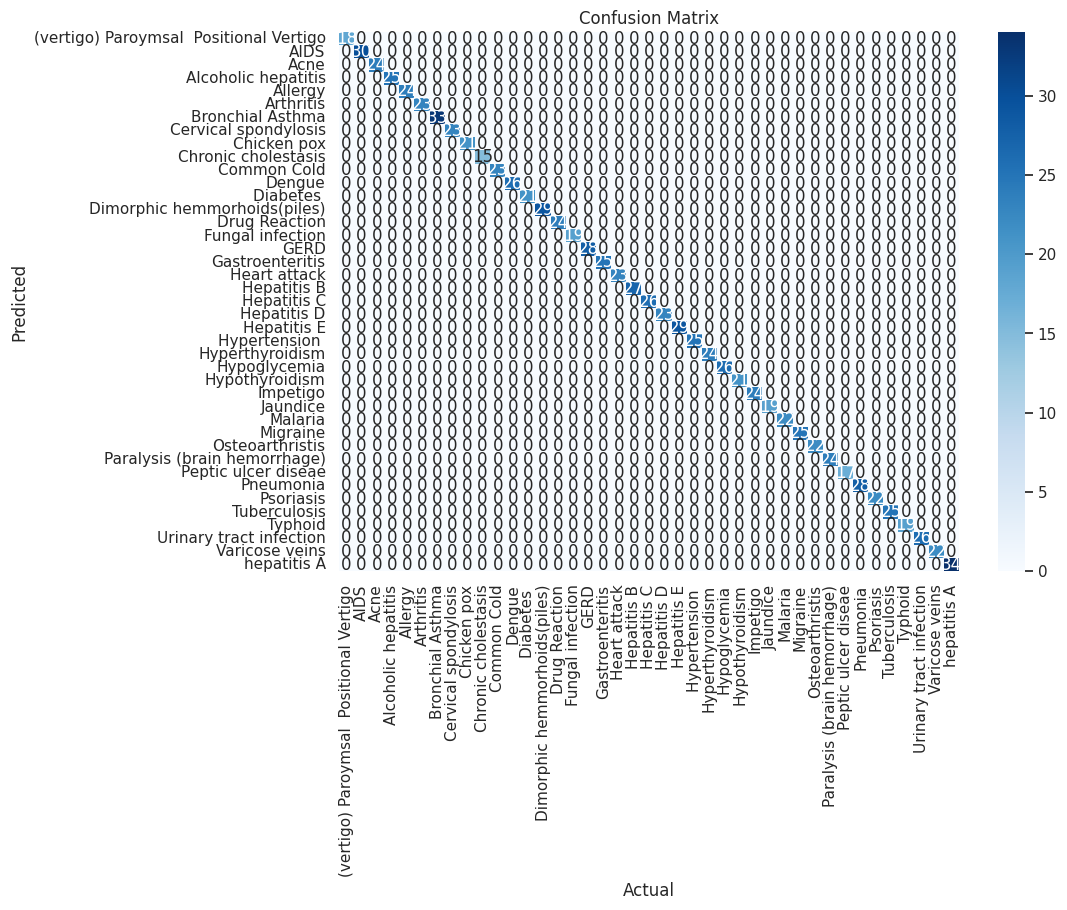

In [6]:
# Now proceed with the train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Debugging: Check for missing values or inconsistencies
print("Checking for missing values:")
print(df.isnull().sum())

# Splitting the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Multinomial Naive Bayes model
model = MultinomialNB()

# Training the model with the training data
model.fit(X_train, y_train)

# Predicting the prognosis for the test data
y_pred = model.predict(X_test)

# Calculating accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Creating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### Use Case Test: Function
- Use case 1 - Change the User symptom variable via function

In [ ]:
def prognosis(model, symptoms, symptom_list):
    """
    Predict the prognosis based on the provided symptoms.

    :param model: Trained Multinomial Naive Bayes model.
    :param symptoms: List of symptoms provided by the user.
    :param symptom_list: List of all possible symptoms from the dataset.
    :return: Predicted prognosis (disease).
    """
    # Initialize an empty array for the input symptoms
    input_symptoms = np.zeros(len(symptom_list))

    # Set the corresponding symptom values to 1 based on user input
    for symptom in symptoms:
        if symptom in symptom_list:
            index = symptom_list.index(symptom)
            input_symptoms[index] = 1

    # Convert input_symptoms to a DataFrame with correct column names
    input_symptoms_df = pd.DataFrame([input_symptoms], columns=symptom_list)

    # Predict the prognosis based on the input symptoms
    prediction = model.predict(input_symptoms_df)

    # Return the predicted prognosis directly
    return prediction[0]

# Example usage:
# Extract symptom names from the DataFrame columns
symptom_list = X.columns.tolist()

# Example user input symptoms
user_symptoms = ['fatigue', 'family_history', 'mucoid_sputum', 'breathlessness']  # Replace with actual symptom names from your dataset

# Predict the disease based on the provided symptoms
predicted_disease = prognosis(model, user_symptoms, symptom_list)
print(f"Predicted Disease: {predicted_disease}")


### **10. Data Consolidation**
- **consolidated_data**: Initializes an empty dictionary to store consolidated data.
- **for loop**: Iterates over each entry in the original dataset to consolidate symptoms under their respective prognosis.
- **consolidated_list**: Converts the consolidated data back into a list format.
- **json.dump()**: Saves the consolidated data into a JSON file named `dataset_test_raw.json`.


In [7]:
import json

# Load the data from the dataTraining.json file
with open('/content/drive/MyDrive/Dev/Chatbot/dataTraining.json', 'r') as file:
    data = json.load(file)

# Dictionary to hold consolidated data
consolidated_data = {}

# Process the data
for entry in data:
    prognosis = entry['prognosis']

    # If prognosis is not in the dictionary, add it with empty symptoms
    if prognosis not in consolidated_data:
        consolidated_data[prognosis] = {}

    # Add symptoms to the existing or new prognosis
    for key, value in entry.items():
        if key != 'prognosis' and value == 1:
            consolidated_data[prognosis][key] = 1

# Convert the consolidated data back into list format
consolidated_list = []
for prognosis, symptoms in consolidated_data.items():
    entry = {'prognosis': prognosis}
    entry.update(symptoms)
    consolidated_list.append(entry)

# Save the consolidated data to dataset_test_raw.json
with open('dataset_test_raw.json', 'w') as outfile:
    json.dump(consolidated_list, outfile, indent=4)

print("Consolidated data has been saved to dataset_test_raw.json")


Consolidated data has been saved to dataset_test_raw.json


###**Chatbot Code build 3:**
- Added the pleasantries & the prognosis model
- Different Training Algorithm using the keras pipeline

### **11. Pleasantries Model Preparation and Training**
- **pleasantries_tags**: Extracts the tags from the pleasantries data.
- **pleasantries_patterns**: Extracts the patterns from the pleasantries data.
- **pleasantries_responses**: Creates a dictionary mapping tags to their respective responses.
- **pleasantries_tokenizer**: Tokenizes the pleasantries patterns and saves the tokenizer.
- **pleasantries_padded**: Pads the sequences generated from the tokenizer.
- **pleasantries_model**: Defines and trains the pleasantries model.
- **model.save()**: Saves the trained pleasantries model.


Training using the tensorflow library

In [8]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')


# Load the data
with open('/content/drive/MyDrive/Dev/Chatbot/pleasantries.json') as file:
    data = json.load(file)

# Extract patterns and tags (labels)
patterns = []
tags = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])

# Encode the tags (labels) as integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(tags)

# Tokenize the patterns (input data)
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(patterns)
sequences = tokenizer.texts_to_sequences(patterns)
word_index = tokenizer.word_index

# Pad the sequences to have the same length
max_length = max(len(sequence) for sequence in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# One-hot encode the labels
labels = tf.keras.utils.to_categorical(labels)

# Split the data into training and validation sets
training_size = int(len(patterns) * 0.8)
train_sequences = padded_sequences[:training_size]
train_labels = labels[:training_size]
validation_sequences = padded_sequences[training_size:]
validation_labels = labels[training_size:]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=16, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(labels[0]), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_sequences,
    train_labels,
    epochs=200,
    validation_data=(validation_sequences, validation_labels),
    verbose=1
)

# Save the model
model.save('/content/drive/MyDrive/Dev/Chatbot/pleasantries_model.h5')


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.0414 - loss: 2.6395 - val_accuracy: 0.0000e+00 - val_loss: 2.6455
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1037 - loss: 2.6366 - val_accuracy: 0.0000e+00 - val_loss: 2.6496
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1296 - loss: 2.6333 - val_accuracy: 0.0000e+00 - val_loss: 2.6536
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1451 - loss: 2.6311 - val_accuracy: 0.0000e+00 - val_loss: 2.6573
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2125 - loss: 2.6293 - val_accuracy: 0.0000e+00 - val_loss: 2.6611
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1657 - loss: 2.6272 - val_accuracy: 0.0000e+00 - val_loss: 2.6656
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1502 - loss: 2.6241 - val_accuracy: 0.0000e+00 - val_loss: 2.6703
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1814 - loss: 2.6197 - val_accuracy: 0

### **13. Symptom-Recognition and Prognosis Prediction Chatbot**
- **joblib.load()**: Loads the pre-trained Naive Bayes model for symptom-prognosis prediction.
- **TfidfVectorizer()**: Initializes the TF-IDF vectorizer with a vocabulary based on symptoms.
- **extract_symptoms_from_text()**: Extracts symptoms from the user's input text using lemmatization and regular expressions.
- **prognosis()**: Predicts the prognosis based on the extracted symptoms using the Naive Bayes model.


In [10]:
import json
import numpy as np
import joblib
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import random

# Load and preprocess pleasantries data
with open('/content/drive/MyDrive/Dev/Chatbot/pleasantries.json', 'r') as file:
    pleasantries_data = json.load(file)

pleasantries_tags = [intent['tag'] for intent in pleasantries_data['intents']]
pleasantries_patterns = [pattern for intent in pleasantries_data['intents'] for pattern in intent['patterns']]
pleasantries_responses = {intent['tag']: intent['responses'] for intent in pleasantries_data['intents']}

pleasantries_tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')
pleasantries_tokenizer.fit_on_texts(pleasantries_patterns)

# Save the tokenizer for future use
pleasantries_tokenizer_json = pleasantries_tokenizer.to_json()
with open('/content/drive/MyDrive/Dev/Chatbot/pleasantries_tokenizer.json', 'w') as json_file:
    json_file.write(pleasantries_tokenizer_json)

pleasantries_sequences = pleasantries_tokenizer.texts_to_sequences(pleasantries_patterns)
pleasantries_padded = pad_sequences(pleasantries_sequences, padding='post')
pleasantries_labels = np.array([pleasantries_tags.index(intent['tag']) for intent in pleasantries_data['intents'] for _ in intent['patterns']])

# Define and train the pleasantries model
pleasantries_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2000, output_dim=16, input_length=pleasantries_padded.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(len(pleasantries_tags), activation='softmax')
])

pleasantries_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
pleasantries_model.fit(pleasantries_padded, pleasantries_labels, epochs=500)

# Save the pleasantries model
pleasantries_model.save('/content/drive/MyDrive/Dev/Chatbot/pleasantries_model.h5')

# Load the symptom-prognosis Naive Bayes model
model_file_path = '/content/drive/MyDrive/Dev/Chatbot/naive_bayes_model.pkl'
model = joblib.load(model_file_path)

# Load symptom list from the data
data_path = '/content/drive/MyDrive/Dev/Chatbot/dataTraining.json'
with open(data_path, 'r') as file:
    data = json.load(file)
df = pd.DataFrame(data)
symptom_list = df.drop('prognosis', axis=1).columns.tolist()

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(vocabulary=symptom_list, tokenizer=lambda x: x.split(','))
tfidf_vectorizer.fit(df.drop('prognosis', axis=1).apply(lambda row: ','.join([symptom for symptom, present in zip(symptom_list, row) if present == 1]), axis=1))

def get_wordnet_pos(word):
    tag = nltk.corpus.wordnet.synsets(word)
    return tag[0].pos() if tag else nltk.corpus.wordnet.NOUN

def extract_symptoms_from_text(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    symptoms_found = []
    words = text.lower().split()

    for word in words:
        lemma = lemmatizer.lemmatize(word, get_wordnet_pos(word))
        for symptom in symptom_list:
            if re.search(r'\b' + re.escape(symptom.lower()) + r'\b', lemma):
                symptoms_found.append(symptom)
            elif symptom.lower().startswith(lemma) or lemma.startswith(symptom.lower()):
                symptoms_found.append(symptom)

    return symptoms_found

def prognosis(symptoms):
    input_symptoms = np.zeros(len(symptom_list))
    for symptom in symptoms:
        if symptom in symptom_list:
            index = symptom_list.index(symptom)
            input_symptoms[index] = 1

    input_symptoms_str = ','.join(symptoms)
    input_symptoms_tfidf = tfidf_vectorizer.transform([input_symptoms_str])
    prediction = model.predict(input_symptoms_tfidf)
    return prediction[0]


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0683 - loss: 2.6417
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0475 - loss: 2.6379 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0475 - loss: 2.6337 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1034 - loss: 2.6299 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1053 - loss: 2.6276
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0949 - loss: 2.6250
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1157 - loss: 2.6217 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1319 - loss: 2.6184 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1651 - loss: 2.6147 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1632 - loss: 2.6085 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2068 - loss: 2.6061 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1755 - los

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


### **14. Save to PDF and Download**
- **FPDF()**: Creates a PDF object.
- **pdf.add_page()**: Adds a new page to the PDF.
- **pdf.set_font()**: Sets the font for the PDF content.
- **pdf.multi_cell()**: Writes content to the PDF with multi-line support.
- **files.download()**: Downloads the generated PDF to the user's local machine.


#### **Note**: when the models are used out of Colab replace with tknter or a any similar library that will do the function of exporting the data to PDF

In [11]:
pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=487bea6022bb55c44d90d61f536cdac016450a9951c146e4896ec045941433fa
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [12]:
import random
import numpy as np
from fpdf import FPDF
from google.colab import files

def save_to_pdf(user_input, symptoms, predicted_prognosis):
    # Specify a default file name
    file_path = "Symptom_Prognosis_Report.pdf"

    pdf = FPDF()
    pdf.add_page()

    # Header (Bold and size 40)
    pdf.set_font("Arial", 'B', size=12)
    pdf.multi_cell(0, 20, "========================================================", align='C')
    pdf.set_font("Arial", 'B', size=20)
    pdf.multi_cell(0, 20, "Naive-Bayes+NLP Medical Chatbot Report", align='C')
    pdf.set_font("Arial", 'B', size=12)
    pdf.multi_cell(0, 20, "========================================================", align='C')

    # Sub-Headers (Bold) and content (Regular)
    pdf.set_font("Arial", 'B', size=12)
    pdf.multi_cell(0, 10, "User inputted Symptoms:")
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, user_input)

    pdf.set_font("Arial", 'B', size=12)
    pdf.multi_cell(0, 10, "Extracted Symptoms:")
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, ', '.join(symptoms))

    pdf.set_font("Arial", 'B', size=12)
    pdf.multi_cell(0, 10, "Prognosis:")
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, predicted_prognosis)

    # Footer
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, "========================================================", align='C')
    pdf.multi_cell(0, 10, "Thank you for using our medical chatbot. Stay healthy!", align='C')
    pdf.multi_cell(0, 10, "========================================================", align='C')

    # Save the PDF to the Colab environment
    pdf.output(file_path)

    # Download the file to the user's local machine
    files.download(file_path)
    print(f"Report generated and ready for download.")

### **15. Chatbot Implementation**
- **chatbot()**: Implements the chatbot interaction loop.
- **input()**: Captures user input.
- **extract_symptoms_from_text()**: Extracts symptoms from the user input.
- **prognosis()**: Predicts the prognosis based on the extracted symptoms.
- **save_to_pdf()**: Prompts the user to save the symptom and prognosis report as a PDF.
- **pleasantries_tokenizer.texts_to_sequences()**: Converts the user input into sequences for pleasantries detection.
- **pad_sequences()**: Pads the sequences to a uniform length.
- **pleasantries_model.predict()**: Predicts the tag for the user input if it is recognized as pleasantries.
- **random.choice()**: Selects a random response from the available responses for the detected tag.


In [25]:
def chatbot():
    print("😊 Hello! How are you?... How can I assist you today?","[Simply input [q] to quit or type 'exit]'")
    while True:
        user_input = input("\nYou: ").strip()

        if user_input.lower() in ["quit", "exit", "done", "q"]:
            print("\nGoodbye! Stay Healthy & Take care!")
            break

        symptoms = extract_symptoms_from_text(user_input)
        if symptoms:
            print(f"Based on your symptoms: {', '.join(symptoms)}")
            predicted_prognosis = prognosis(symptoms)
            print(f"\nYou might have: {predicted_prognosis}. Please consult a doctor for verification.\n\n")

            # Prompt the user to save the report
            save_prompt = input("Do you want to save this symptom & prognosis to a PDF for your verification? Yes[Y] or No[N]: ").strip().lower()
            if save_prompt == "y":
                if save_to_pdf(user_input, symptoms, predicted_prognosis):
                    break
                    user_input="q"
                    print("The conversation has been reset. How can I assist you today?")
                    # End the conversation after saving the report
            elif save_prompt == "n":
                print("Okay, not saving the report. Continuing the conversation...\nHow are you feeling today?\n")
            else:
                print("Choice was neither yes nor no, not saving the report. Continuing the conversation...\n")

        else:
            # Check for pleasantries
            user_sequence = pleasantries_tokenizer.texts_to_sequences([user_input])
            user_padded = pad_sequences(user_sequence, padding='post', maxlen=pleasantries_padded.shape[1])
            pred = pleasantries_model.predict(user_padded)
            tag_idx = np.argmax(pred)
            response_tag = pleasantries_tags[tag_idx]

            # Select a random response from the detected tag's responses
            response = random.choice(pleasantries_responses[response_tag])
            print(f"Chatbot: {response}\n\n")


**Note**: A Flaw of this model using the Naive-Base algorithm for fetching the matching symptoms for an accurate prognosis is that it needs at least 4 symptoms so it fetches the nearest accurate prognosis. Anything less will result in lesser accuracy.

In [26]:
chatbot()

😊 Hello! How are you?... How can I assist you today? [Simply input [q] to quit or type 'exit]'

You: "I'm feeling really itchy, and I've noticed a rash along with some nodules on my skin. Could this be something serious?"
Based on your symptoms: acidity, anxiety, abdominal_pain, acute_liver_failure, altered_sensorium, abnormal_menstruation, belly_pain

You might have: Paralysis (brain hemorrhage). Please consult a doctor for verification.


Do you want to save this symptom & prognosis to a PDF for your verification? Yes[Y] or No[N]: n
Okay, not saving the report. Continuing the conversation...
How are you feeling today?


You: "I can't stop sneezing, and I feel chills running through me. My eyes are constantly watering. What could be wrong?"
Based on your symptoms: itching, irregular_sugar_level, indigestion, irritation_in_anus, internal_itching, irritability, increased_appetite, inflammatory_nails, chills, belly_pain

You might have: Peptic ulcer diseae. Please consult a doctor for ve